<a href="https://colab.research.google.com/github/FaYeest/Tugas-AP3-Gunadarma/blob/main/datasciencemodeling_with_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nama: Muhammad Tubagus Farrasandi

Dataset ini berisi informasi tentang karakteristik pasien yang berpotensi menjadi faktor penentu terkena atau tidak terkenanya virus COVID-19.

# Import Library
# Pada bagian ini, kita mengimpor library yang diperlukan:
# 1. pandas dan numpy: Untuk manipulasi dan analisis data.
# 2. sklearn.model_selection: Untuk membagi data menjadi train dan test.
# 3. sklearn.ensemble: Untuk membuat model Random Forest.
# 4. sklearn.metrics: Untuk mengevaluasi model.
# 5. sklearn.preprocessing: Untuk mengonversi nilai kategori menjadi numerik.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

Membaca Dataset dari file CSV menggunakan pandas. Dataset ini memuat berbagai informasi tentang karakteristik pasien.

In [ ]:
df = pd.read_csv('/content/covid-19_new1.csv')

Menampilkan semua data dalam bentuk tabel

In [ ]:
df

,No,Usia,Suhu_Tubuh,Batuk,Sakit_Kepala,Nyeri_Otot,Status
0,1,25,36.5,Tidak,Tidak,Tidak,No
1,2,42,38.2,Ya,Ya,Ya,Yes
2,3,31,37.1,Tidak,Tidak,Tidak,No
3,4,55,39.5,Ya,Ya,Ya,Yes
4,5,28,36.8,Tidak,Tidak,Tidak,No
5,6,35,38.8,Ya,Ya,Ya,Yes
6,7,22,36.2,Tidak,Tidak,Tidak,No
7,8,48,39.2,Ya,Ya,Ya,Yes
8,9,29,37.5,Tidak,Tidak,Tidak,No
9,10,40,38.5,Ya,Ya,Ya,Yes


menampilkan 5 data awal

In [ ]:
df.head()

,No,Usia,Suhu_Tubuh,Batuk,Sakit_Kepala,Nyeri_Otot,Status
0,1,25,36.5,Tidak,Tidak,Tidak,No
1,2,42,38.2,Ya,Ya,Ya,Yes
2,3,31,37.1,Tidak,Tidak,Tidak,No
3,4,55,39.5,Ya,Ya,Ya,Yes
4,5,28,36.8,Tidak,Tidak,Tidak,No


Menampilkan informasi tentang dataset, seperti jumlah baris dan kolom, tipe data, dan apakah terdapat nilai yang hilang.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No            20 non-null     int64  
 1   Usia          20 non-null     int64  
 2   Suhu_Tubuh    20 non-null     float64
 3   Batuk         20 non-null     object 
 4   Sakit_Kepala  20 non-null     object 
 5   Nyeri_Otot    20 non-null     object 
 6   Status        14 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.2+ KB


Menampilkan ringkasan statistik dari dataset, seperti rata-rata, nilai minimum, maksimum, dan standar deviasi untuk setiap kolom numerik.

In [ ]:
df.describe()

,No,Usia,Suhu_Tubuh
count,20.000000,20.000000,20.000000
mean,5.250000,25.550000,26.585000
std,4.940435,19.264024,17.882461
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,4.500000,28.500000,37.000000
75%,9.250000,40.500000,38.575000
max,14.000000,55.000000,39.800000


Kolom 'No' dihapus karena hanya berfungsi sebagai identifier dan tidak relevan untuk proses prediksi.

In [ ]:
if 'No' in df.columns:
    df = df.drop(columns=['No'])

Menghapus baris-baris yang memiliki nilai kosong (missing values) di dataset.

In [ ]:
df_clean = df.dropna()

Menampilkan data yang sudah dibersihkan

In [ ]:
df_clean

,Usia,Suhu_Tubuh,Batuk,Sakit_Kepala,Nyeri_Otot,Status
0,25,36.5,Tidak,Tidak,Tidak,No
1,42,38.2,Ya,Ya,Ya,Yes
2,31,37.1,Tidak,Tidak,Tidak,No
3,55,39.5,Ya,Ya,Ya,Yes
4,28,36.8,Tidak,Tidak,Tidak,No
5,35,38.8,Ya,Ya,Ya,Yes
6,22,36.2,Tidak,Tidak,Tidak,No
7,48,39.2,Ya,Ya,Ya,Yes
8,29,37.5,Tidak,Tidak,Tidak,No
9,40,38.5,Ya,Ya,Ya,Yes


In [ ]:
df_clean.describe()

,Usia,Suhu_Tubuh
count,14.000000,14.000000
mean,36.500000,37.978571
std,10.581188,1.173541
min,22.000000,36.200000
25%,28.250000,36.950000
50%,34.000000,38.000000
75%,44.250000,38.875000
max,55.000000,39.800000


In [ ]:
df_clean.columns

Index(['Usia', 'Suhu_Tubuh', 'Batuk', 'Sakit_Kepala', 'Nyeri_Otot', 'Status'], dtype='object')

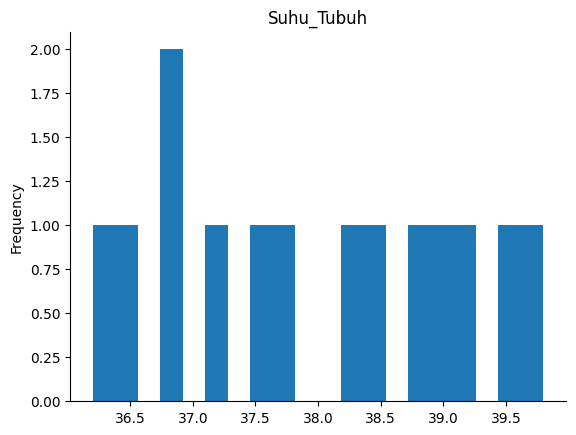

In [ ]:
from matplotlib import pyplot as plt
df_clean['Suhu_Tubuh'].plot(kind='hist', bins=20, title='Suhu_Tubuh')
plt.gca().spines[['top', 'right',]].set_visible(False)

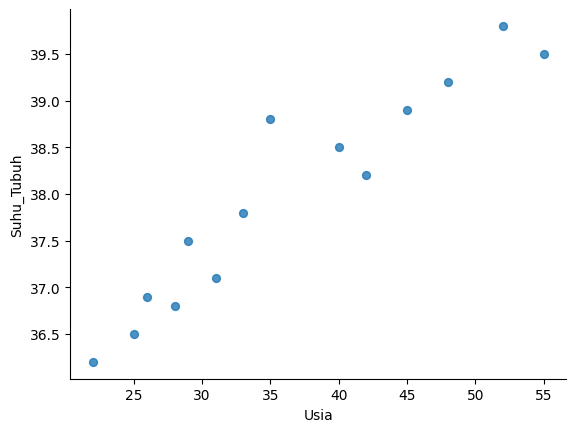

In [ ]:
df_clean.plot(kind='scatter', x='Usia', y='Suhu_Tubuh', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

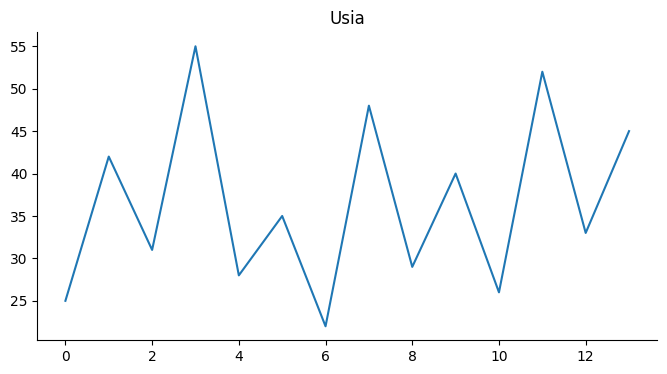

In [ ]:
df_clean['Usia'].plot(kind='line', figsize=(8, 4), title='Usia')
plt.gca().spines[['top', 'right']].set_visible(False)

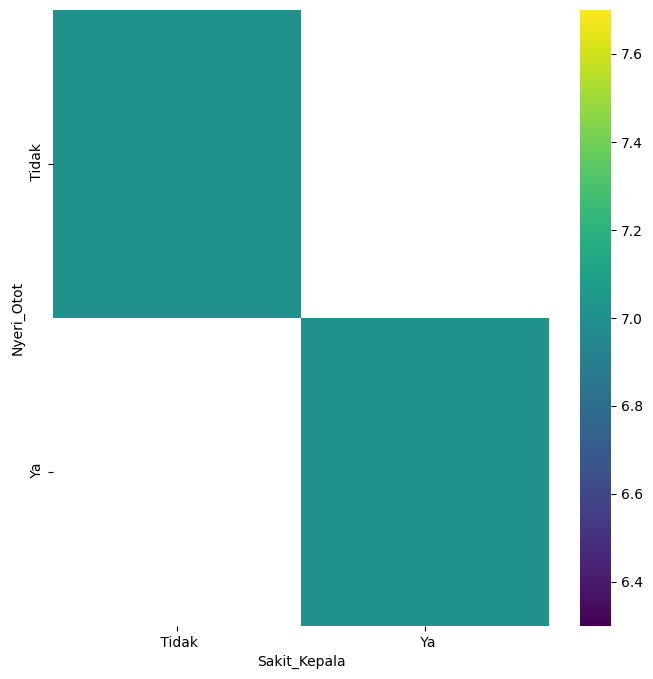

In [ ]:
import seaborn as sns
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Nyeri_Otot'].value_counts()
    for x_label, grp in df_clean.groupby('Sakit_Kepala')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sakit_Kepala')
_ = plt.ylabel('Nyeri_Otot')

Mengubah kolom dengan nilai kategori menjadi nilai numerik menggunakan LabelEncoder. Hal ini diperlukan agar model dapat memproses data tersebut.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in df_clean.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

<ipython-input-95-8a42a220345e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
<ipython-input-95-8a42a220345e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = le.fit_transform(df_clean[col])
<ipython-input-95-8a42a220345e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

Fitur (X) adalah kolom-kolom yang akan digunakan untuk memprediksi,sedangkan target (y) adalah kolom yang ingin diprediksi ('Status').

In [ ]:
target_column = 'Status'  # Replace with the correct column name if different
if target_column not in df_clean.columns:
    raise KeyError(f"Target column '{target_column}' not found in dataset. Available columns: {df_clean.columns}")

In [ ]:
X = df_clean.drop(target_column, axis=1)  # Features
y = df_clean[target_column]  # Target

# Dataset dibagi menjadi data training (80%) dan data testing (20%) menggunakan train_test_split dari sklearn.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Random Forest Classifier dilatih menggunakan data training.

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Model dievaluasi menggunakan data testing dengan menghitung akurasi dan menghasilkan laporan klasifikasi.

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Menerima input dari pengguna dan memprosesnya menjadi format yang cocok untuk model. Model kemudian memprediksi apakah pasien terkena COVID-19 berdasarkan input tersebut.

In [ ]:
usia = int(input("Masukkan usia: "))
suhu_tubuh = float(input("Masukkan suhu tubuh: "))
batuk = input("Apakah batuk? (ya/tidak): ").strip().lower()
sakit_kepala = input("Apakah sakit kepala? (ya/tidak): ").strip().lower()
nyeri_otot = input("Apakah nyeri otot? (ya/tidak): ").strip().lower()

# Ensure inputs are valid
if batuk not in ['ya', 'tidak'] or sakit_kepala not in ['ya', 'tidak'] or nyeri_otot not in ['ya', 'tidak']:
    raise ValueError("Input untuk batuk, sakit kepala, dan nyeri otot harus 'ya' atau 'tidak'.")

# Convert inputs to numerical format
batuk = 1 if batuk == 'ya' else 0
sakit_kepala = 1 if sakit_kepala == 'ya' else 0
nyeri_otot = 1 if nyeri_otot == 'ya' else 0

# Create a new data point for prediction
new_data = pd.DataFrame({
    'Usia': [usia],
    'Suhu_Tubuh': [suhu_tubuh],
    'Batuk': [batuk],
    'Sakit_Kepala': [sakit_kepala],
    'Nyeri_Otot': [nyeri_otot]
})

# Make the prediction
prediction = model.predict(new_data)

# Display the prediction
if prediction[0] == 1:
    print("Prediksi: Terkena COVID-19")
else:
    print("Prediksi: Tidak Terkena COVID-19")


Masukkan usia: 26
Masukkan suhu tubuh: 39.8
Apakah batuk? (ya/tidak): tidak
Apakah sakit kepala? (ya/tidak): ya
Apakah nyeri otot? (ya/tidak): ya
Prediksi: Terkena COVID-19


In [ ]:
usia = int(input("Masukkan usia: "))
suhu_tubuh = float(input("Masukkan suhu tubuh: "))
batuk = input("Apakah batuk? (ya/tidak): ").strip().lower()
sakit_kepala = input("Apakah sakit kepala? (ya/tidak): ").strip().lower()
nyeri_otot = input("Apakah nyeri otot? (ya/tidak): ").strip().lower()

# Ensure inputs are valid
if batuk not in ['ya', 'tidak'] or sakit_kepala not in ['ya', 'tidak'] or nyeri_otot not in ['ya', 'tidak']:
    raise ValueError("Input untuk batuk, sakit kepala, dan nyeri otot harus 'ya' atau 'tidak'.")

# Convert inputs to numerical format
batuk = 1 if batuk == 'ya' else 0
sakit_kepala = 1 if sakit_kepala == 'ya' else 0
nyeri_otot = 1 if nyeri_otot == 'ya' else 0

# Create a new data point for prediction
new_data = pd.DataFrame({
    'Usia': [usia],
    'Suhu_Tubuh': [suhu_tubuh],
    'Batuk': [batuk],
    'Sakit_Kepala': [sakit_kepala],
    'Nyeri_Otot': [nyeri_otot]
})

# Make the prediction
prediction = model.predict(new_data)

# Display the prediction
if prediction[0] == 1:
    print("Prediksi: Terkena COVID-19")
else:
    print("Prediksi: Tidak Terkena COVID-19")

Masukkan usia: 24
Masukkan suhu tubuh: 39.4
Apakah batuk? (ya/tidak): tidak
Apakah sakit kepala? (ya/tidak): ya
Apakah nyeri otot? (ya/tidak): tidak
Prediksi: Tidak Terkena COVID-19


In [ ]:
usia = int(input("Masukkan usia: "))
suhu_tubuh = float(input("Masukkan suhu tubuh: "))
batuk = input("Apakah batuk? (ya/tidak): ").strip().lower()
sakit_kepala = input("Apakah sakit kepala? (ya/tidak): ").strip().lower()
nyeri_otot = input("Apakah nyeri otot? (ya/tidak): ").strip().lower()

# Ensure inputs are valid
if batuk not in ['ya', 'tidak'] or sakit_kepala not in ['ya', 'tidak'] or nyeri_otot not in ['ya', 'tidak']:
    raise ValueError("Input untuk batuk, sakit kepala, dan nyeri otot harus 'ya' atau 'tidak'.")

# Convert inputs to numerical format
batuk = 1 if batuk == 'ya' else 0
sakit_kepala = 1 if sakit_kepala == 'ya' else 0
nyeri_otot = 1 if nyeri_otot == 'ya' else 0

# Create a new data point for prediction
new_data = pd.DataFrame({
    'Usia': [usia],
    'Suhu_Tubuh': [suhu_tubuh],
    'Batuk': [batuk],
    'Sakit_Kepala': [sakit_kepala],
    'Nyeri_Otot': [nyeri_otot]
})

# Make the prediction
prediction = model.predict(new_data)

# Display the prediction
if prediction[0] == 1:
    print("Prediksi: Terkena COVID-19")
else:
    print("Prediksi: Tidak Terkena COVID-19")

Masukkan usia: 24
Masukkan suhu tubuh: 40
Apakah batuk? (ya/tidak): tidak
Apakah sakit kepala? (ya/tidak): tidak
Apakah nyeri otot? (ya/tidak): ya
Prediksi: Tidak Terkena COVID-19


In [ ]:
usia = int(input("Masukkan usia: "))
suhu_tubuh = float(input("Masukkan suhu tubuh: "))
batuk = input("Apakah batuk? (ya/tidak): ").strip().lower()
sakit_kepala = input("Apakah sakit kepala? (ya/tidak): ").strip().lower()
nyeri_otot = input("Apakah nyeri otot? (ya/tidak): ").strip().lower()

# Ensure inputs are valid
if batuk not in ['ya', 'tidak'] or sakit_kepala not in ['ya', 'tidak'] or nyeri_otot not in ['ya', 'tidak']:
    raise ValueError("Input untuk batuk, sakit kepala, dan nyeri otot harus 'ya' atau 'tidak'.")

# Convert inputs to numerical format
batuk = 1 if batuk == 'ya' else 0
sakit_kepala = 1 if sakit_kepala == 'ya' else 0
nyeri_otot = 1 if nyeri_otot == 'ya' else 0

# Create a new data point for prediction
new_data = pd.DataFrame({
    'Usia': [usia],
    'Suhu_Tubuh': [suhu_tubuh],
    'Batuk': [batuk],
    'Sakit_Kepala': [sakit_kepala],
    'Nyeri_Otot': [nyeri_otot]
})

# Make the prediction
prediction = model.predict(new_data)

# Display the prediction
if prediction[0] == 1:
    print("Prediksi: Terkena COVID-19")
else:
    print("Prediksi: Tidak Terkena COVID-19")

Masukkan usia: 24
Masukkan suhu tubuh: 40
Apakah batuk? (ya/tidak): ya
Apakah sakit kepala? (ya/tidak): tidak
Apakah nyeri otot? (ya/tidak): ya
Prediksi: Terkena COVID-19
